# Homework 1: Setup and (Re-)Introduction to Python

## Course Policies

Here are some important course policies. These are also located at
http://www.ds100.org/sp17/.

**Tentative Grading**

There will be 7 challenging homework assignments. Homeworks must be completed
individually and will mix programming and short answer questions. At the end of
each week of instruction we will have an online multiple choice quiz ("vitamin") that will
help you stay up-to-date with lecture materials. Labs assignments will be
graded for completion and are intended to help with the homework assignments.

- 40% Homeworks
- 13% Vitamins
- 7% Labs
- 15% Midterm
- 25% Final

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your solution. Keep in mind that content from the homework and vitamins will
likely be covered on both the midterm and final.

## This assignment

In this assignment, you'll learn (or review):

* How to set up Jupyter on your own computer.
* How to check out and submit assignments for this class.
* Python basics, like defining functions.
* How to use the `numpy` library to compute with arrays of numbers.

# 1. Setup

If you haven't already, read through the instructions at
http://www.ds100.org/spring-2017/setup.

The instructions for submission are at the end of this notebook.

First, let's make sure you have the latest version of okpy.

In [1]:
!pip install -U okpy

If you've set up your environment properly, this cell should run without problems:

In [5]:
import math
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datascience import *

from client.api.notebook import Notebook
ok = Notebook('hw1.ok')

Assignment: Homework 1
OK, version v1.11.1



Now, run this cell to log into [OkPy](http://okpy.org/).

**This is the submission system for the class;** you will use this
website to confirm that you've submitted your assignment.

In [3]:
ok.auth(inline=True)

# 2. Python

Python is the main programming language we'll use in this course.  We assume you have some experience with Python or can learn it yourself, but here is a brief review.

Below are some simple Python code fragments.

You should feel confident explaining what each fragment is doing. If not,
please brush up on your Python. There a number of tutorials online (search
for "Python tutorial"). https://docs.python.org/3/tutorial/ is a good place to
start.

In [23]:
2 + 2

4

In [24]:
# This is a comment.
# In Python, the ** operator performs exponentiation.
math.e**(-2)

0.1353352832366127

In [25]:
print("Hello" + ",", "world!")
"Hello, cell output!"

Hello, world!


'Hello, cell output!'

In [30]:
def add2(x):
    """This docstring explains what this function does: it adds 2 to a number."""
    return x + 2

In [27]:
def makeAdder(amount):
    """Make a function that adds the given amount to a number."""
    def addAmount(x):
        return x + amount
    return addAmount

add3 = makeAdder(3)
add3(4)

7

In [28]:
# add4 is very similar to add2, but it's been created using a lambda expression.
add4 = lambda x: x + 4
add4(5)

9

In [29]:
sameAsMakeAdder = lambda amount: lambda x: x + amount
add5 = sameAsMakeAdder(5)
add5(6)

11

In [31]:
def fib(n):
    if n <= 1:
        return 1
    # Functions can call themselves recursively.
    return fib(n-1) + fib(n-2)

fib(4)

5

In [32]:
# A for loop repeats a block of code once for each
# element in a given collection.
for i in range(5):
    if i % 2 == 0:
        print(2**i)
    else:
        print("Odd power of 2")

1
Odd power of 2
4
Odd power of 2
16


In [33]:
# A list comprehension is a convenient way to apply a function
# to each element in a given collection.
# The String method join appends together all its arguments
# separated by the given string.  So we append each element produced
# by the list comprehension, each separated by a newline ("\n").
print("\n".join([str(2**i) if i % 2 == 0 else "Odd power of 2" for i in range(5)]))

1
Odd power of 2
4
Odd power of 2
16


#### Question 1

##### Question 1a
Write a function nums_reversed that takes in an integer `n` and returns a string
containing the numbers 1 through `n` including `n` in reverse order, separated
by spaces. For example:

    >>> nums_reversed(5)
    '5 4 3 2 1'

***Note:*** The ellipsis (`...`) indicates something you should fill in.  It *doesn't* necessarily imply you should replace it with only one line of code.

In [34]:
def nums_reversed(n):
    return " ".join([str(i) for i in range(n, 0, -1)])

In [8]:
_ = ok.grade('q01a')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



##### Question 1b

Write a function `string_splosion` that takes in a non-empty string like
`"Code"` and returns a long string containing every prefix of the input.
For example:

    >>> string_splosion('Code')
    'CCoCodCode'
    >>> string_splosion('data!')
    'ddadatdatadata!'
    >>> string_splosion('hi')
    'hhi'


In [9]:
def string_splosion(string):
    if string == '':
        return ''
    return string_splosion(string[:-1]) + string

In [10]:
_ = ok.grade('q01b')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



##### Question 1c

Write a function `double100` that takes in a list of integers
and returns `True` only if the list has two `100`s next to each other.

    >>> double100([100, 2, 3, 100])
    False
    >>> double100([2, 3, 100, 100, 5])
    True


In [11]:
def double100(nums):
    if len(nums) < 2: return False
    for i in range(0, len(nums)-1, 1):
        if nums[i] == nums[i+1] ==100:return True
    return False

In [12]:
_ = ok.grade('q01c')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



##### Question 1d

Write a function `median` that takes in a list of numbers
and returns the median element of the list. If the list has even
length, it returns the mean of the two elements in the middle.

    >>> median([5, 4, 3, 2, 1])
    3
    >>> median([ 40, 30, 10, 20 ])
    25

In [13]:
def median(number_list):
    n = len(number_list)
    sorted_list = sorted(number_list)
    return sorted_list[n // 2] if n % 2 == 1 else (sorted_list[n // 2 - 1] + sorted_list[n // 2]) / 2

In [14]:
_ = ok.grade('q01d')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



# 3. `NumPy`

The `NumPy` library lets us do fast, simple computing with numbers in Python.

## 3.1. Arrays

The basic `NumPy` data type is the array, a homogeneously-typed sequential collection (a list of things that all have the same type).  Arrays will most often contain strings, numbers, or other arrays.

Let's create some arrays:

In [15]:
array1 = np.array([2, 3, 4, 5])
array2 = np.arange(4)
array1, array2

(array([2, 3, 4, 5]), array([0, 1, 2, 3]))

Math operations on arrays happen *element-wise*. Here's what we mean:

In [16]:
array1 * 2

array([ 4,  6,  8, 10])

In [17]:
array1 * array2

array([ 0,  3,  8, 15])

In [18]:
array1 ** array2

array([  1,   3,  16, 125])

This is not only very convenient (fewer `for` loops!) but also fast. `NumPy` is designed to run operations on arrays much faster than equivalent Python code on lists. Data science sometimes involves working with large datasets where speed is important - even the constant factors!

**Jupyter pro-tip**: Pull up the docs for any function in Jupyter by running a cell with
the function name and a `?` at the end:

In [19]:
np.arange?

**Another Jupyter pro-tip**: Pull up the docs for any function in Jupyter by typing the function
name, then `<Shift>-<Tab>` on your keyboard. Super convenient when you forget the order
of the arguments to a function. You can press `<Tab>` multiple tabs to expand the docs.

Try it on the function below:

In [20]:
np.linspace(0,5)

array([ 0.        ,  0.10204082,  0.20408163,  0.30612245,  0.40816327,
        0.51020408,  0.6122449 ,  0.71428571,  0.81632653,  0.91836735,
        1.02040816,  1.12244898,  1.2244898 ,  1.32653061,  1.42857143,
        1.53061224,  1.63265306,  1.73469388,  1.83673469,  1.93877551,
        2.04081633,  2.14285714,  2.24489796,  2.34693878,  2.44897959,
        2.55102041,  2.65306122,  2.75510204,  2.85714286,  2.95918367,
        3.06122449,  3.16326531,  3.26530612,  3.36734694,  3.46938776,
        3.57142857,  3.67346939,  3.7755102 ,  3.87755102,  3.97959184,
        4.08163265,  4.18367347,  4.28571429,  4.3877551 ,  4.48979592,
        4.59183673,  4.69387755,  4.79591837,  4.89795918,  5.        ])

#### Question 2
Using the `np.linspace` function, create an array called `xs` that contains
100 evenly spaced points between `0` and `2 * np.pi`. Then, create an array called `ys` that
contains the value of $ \sin{x} $ at each of those 100 points.

*Hint:* Use the `np.sin` function. You should be able to define each variable with one line of code.)

In [21]:
xs = np.linspace(0, 2*np.pi, 100)
ys = np.sin(xs)

In [22]:
_ = ok.grade('q02')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



The `plt.plot` function from another library called `matplotlib` lets us make plots. It takes in
an array of x-values and a corresponding array of y-values.  It makes a scatter plot of the (x, y) pairs and connects points with line segments.  If you give it enough points, it will appear to create a smooth curve.

Let's plot the points you calculated in the previous question:

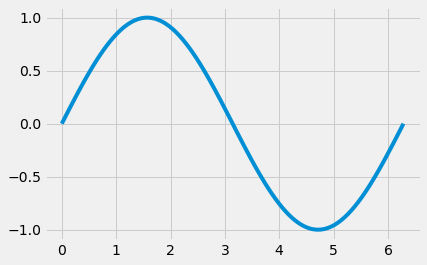

In [35]:
plt.plot(xs, ys)

This is a useful recipe for plotting any function:
1. Use `linspace` or `arange` to make a range of x-values.
2. Apply the function to each point to produce y-values.
3. Plot the points.

You might remember from calculus that the derivative of the `sin` function is the `cos` function.  That means that the slope of the curve you plotted above at any point `xs[i]` is given by `cos(xs[i])`.  You can try verifying this by plotting `cos` in the next cell.

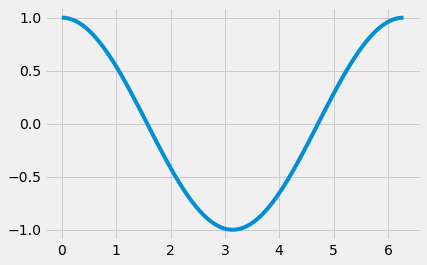

In [36]:
plt.plot(xs, np.cos(xs))

Calculating derivatives is an important operation in data science, but it can be difficult.  We can have computers do it for us using a simple idea called *numerical differentiation*.

Consider the `i`th point `(xs[i], ys[i])`.  The slope of `sin` at `xs[i]` is roughly the slope of the line connecting `(xs[i], ys[i])` to the nearby point `(xs[i+1], ys[i+1])`.  That slope is:

    (ys[i+1] - ys[i]) / (xs[i+1] - xs[i])

If the difference between `xs[i+1]` and `xs[i]` were infinitessimal, we'd have exactly the derivative.  In numerical differentiation we take advantage of the fact that it's often good enough to use "really small" differences instead.

#### Question 3

Define a function called `derivative` that takes in an array of x-values and their
corresponding y-values and computes the slope of the line connecting each point to the next point.

    >>> derivative(np.array([0, 1, 2]), np.array([2, 4, 6]))
    np.array([2., 2.])
    >>> derivative(np.arange(5), np.arange(5) ** 2)
    np.array([0., 2., 4., 6.])

Notice that the output array has one less element than the inputs since we can't
find the slope for the last point.

It's possible to do this in one short line using [slicing](http://pythoncentral.io/how-to-slice-listsarrays-and-tuples-in-python/), but feel free to use whatever method you know.

**Then**, use your `derivative` function to compute the slopes for each point in `xs`, `ys`.
Store the slopes in an array called `slopes`.

In [37]:
def derivative(xvals, yvals):
    return (yvals[1:] - yvals[:-1]) / (xvals[1:] - xvals[:-1])
slopes = derivative(xs, ys)
slopes[:5]

array([ 0.9993288 ,  0.99530486,  0.98727317,  0.97526609,  0.95933195])

In [38]:
_ = ok.grade('q03')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 4
Plot the slopes you computed.  Then plot `cos` on top of your plot, calling `plt.plot` again in the same cell.  Did numerical differentiation work?

*Note:* Since we have only 99 slopes, you'll need to take off the last x-value before plotting to avoid an error.

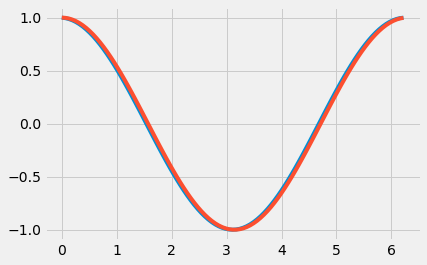

In [39]:
plt.plot(xs[:-1], slopes)
plt.plot(xs[:-1], np.cos(xs)[:-1])

In the plot above, it's probably not clear which curve is which.  Examine the cell below to see how to plot your results with a legend.

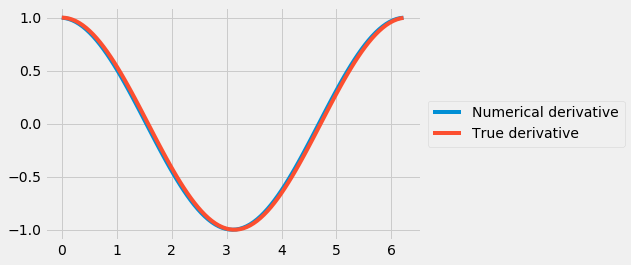

In [40]:
plt.plot(xs[:-1], slopes, label="Numerical derivative")
plt.plot(xs[:-1], np.cos(xs[:-1]), label="True derivative")
# You can just call plt.legend(), but the legend will cover up
# some of the graph.  Use bbox_to_anchor=(x,y) to set the x-
# and y-coordinates of the center-left point of the legend,
# where, for example, (0, 0) is the bottom-left of the graph
# and (1, .5) is all the way to the right and halfway up.
plt.legend(bbox_to_anchor=(1, .5), loc="center left");

## 3.2. Multidimensional Arrays
A multidimensional array is a primitive version of a table, containing only one kind of data and having no column labels.  A 2-dimensional array is useful for working with *matrices* of numbers.

In [41]:
# The zeros function creates an array with the given shape.
# For a 2-dimensional array like this one, the first
# coordinate says how far the array goes *down*, and the
# second says how far it goes *right*.
array3 = np.zeros((4, 5))
array3

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [42]:
# The shape attribute returns the dimensions of the array.
array3.shape

(4, 5)

In [43]:
# You can think of array3 as an array containing 4 arrays, each
# containing 5 zeros.  Accordingly, we can set or get the third
# element of the second array in array 3 using standard Python
# array indexing syntax twice:
array3[1][2] = 7
array3

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [44]:
# This comes up so often that there is special syntax provided
# for it.  The comma syntax is equivalent to using multiple
# brackets:
array3[1, 2] = 8
array3

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

Arrays allow you to assign to multiple places at once.  The special character `:` means "everything."

In [45]:
array4 = np.zeros((3, 5))
array4[:, 2] = 5
array4

array([[ 0.,  0.,  5.,  0.,  0.],
       [ 0.,  0.,  5.,  0.,  0.],
       [ 0.,  0.,  5.,  0.,  0.]])

In fact, you can use arrays of indices to assign to multiple places.  Study the next example and make sure you understand how it works.

In [46]:
array5 = np.zeros((3, 5))
rows = np.array([1, 0, 2])
cols = np.array([3, 1, 4])

# Indices (1,3), (0,1), and (2,4) will be set.
array5[rows, cols] = 3
array5

array([[ 0.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3.,  0.],
       [ 0.,  0.,  0.,  0.,  3.]])

#### Question 5
Create a 50x50 array called `twice_identity` that contains all zeros except on the
diagonal, where it contains the value `2`.

Start by making a 50x50 array of all zeros, then set the values.  Use indexing, not a `for` loop!  (Don't use `np.eye` either, though you might find that function useful later.)

In [49]:
twice_identity = np.zeros((50, 50))
rows = np.arange(50)
twice_identity[rows, rows] = 2
twice_identity

array([[ 2.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  2.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  2.]])

In [50]:
_ = ok.grade('q05')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



# 4. A Picture Puzzle

Your boss has given you some strange text files. He says they're images,
some of which depict a summer scene and the rest a winter scene.

He demands that you figure out how to determine whether a given
text file represents a summer scene or a winter scene.

You receive 10 files, `1.txt` through `10.txt`. Peek at the files in a text
editor of your choice.

#### Question 6
How do you think the contents of the file are structured? Take your best guess.

The content of these files are representations of the 10 images encrypted in a certain way, which I am not sure about.

#### Question 7
Create a function called `read_file_lines` that takes in a filename as its argument.
This function should return a Python list containing the lines of the
file as strings. That is, if `1.txt` contains:

```
1 2 3
3 4 5
7 8 9
```

the return value should be: `['1 2 3\n', '3 4 5\n', '7 8 9\n']`.

**Then**, use the `read_file_lines` function on the file `1.txt`, reading the contents
into a variable called `file1`.

*Hint:* Check out [this Stack Overflow page](http://stackoverflow.com/questions/3277503/how-to-read-a-file-line-by-line-into-a-list-with-python) on reading lines of files.

In [53]:
def read_file_lines(filename):
    with open(filename) as f:
        output = f.readlines()
    return output
file1 = read_file_lines('1.txt')
file1[:5]

['240 215\n', '0 0 0\n', '0 0 1\n', '0 1 1\n', '0 1 2\n']

In [54]:
_ = ok.grade('q07')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Each file begins with a line containing two numbers.  After checking the length of
a file, you could notice that the product of these two numbers equals the number of
lines in each file (other than the first one).

This suggests the rows represent elements in a 2-dimensional grid.  In fact, each
dataset represents an image!

On the first line, the first of the two numbers is
the height of the image (in pixels) and the second is the width (again in pixels).

Each line in the rest of the file contains the pixels of the image.
Each pixel is a triplet of numbers denoting how much red, green, and blue
the pixel contains, respectively.

In image processing, each column in one of these image files is called a *channel*
(disregarding line 1).  So there are 3 channels: red, green, and blue.

#### Question 8
Define a function called `lines_to_image` that takes in the contents of a
file as a list (such as `file1`). It should return an array containing integers of
shape `(n_rows, n_cols, 3)`. That is, it contains the pixel triplets organized in the
correct number of rows and columns.

For example, if the file originally contained:

```
4 2
0 0 0
10 10 10
2 2 2
3 3 3
4 4 4
5 5 5
6 6 6
7 7 7
```

The resulting array should be a *3-dimensional* array that looks like this:

```
array([
    [ [0,0,0], [10,10,10] ],
    [ [2,2,2], [3,3,3] ],
    [ [4,4,4], [5,5,5] ],
    [ [6,6,6], [7,7,7] ]
])
```

The string method `split` and the function `np.reshape` might be useful.

**Important note:** You must call `.astype(np.uint8)` on the final array before
returning so that `numpy` will recognize the array represents an image.

Once you've defined the function, set `image1` to the result of calling
`lines_to_image` on `file1`.

In [61]:
def lines_to_image(file_lines):
    rows, cols = [int(index) for index in file_lines[0].split()]
    cleaned_items = [item.strip() for item in file_lines[1:]]
    rgbs = [[int(num) for num in item.split()] for item in cleaned_items]
    rgb_image= np.array(rgbs)
    image_array = rgb_image.reshape((rows, cols, 3))
    # Make sure to call astype like this on the 3-dimensional array
    # you produce, before returning it.
    return image_array.astype(np.uint8)

image1 = lines_to_image(file1)
image1.shape

(240, 215, 3)

In [62]:
_ = ok.grade('q08')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 9

Images in `numpy` are simply arrays, but we can also display them them as
actual images in this notebook.

Use the provided `show_images` function to display `image1`. You may call it
like `show_images(image1)`. If you later have multiple images to display, you
can call `show_images([image1, image2])` to display them all at once.

The resulting image should look almost completely black. Why do you suppose
that is?

Answer: The rgb numbers are all too small.

In [65]:
def show_images(images, ncols=2, figsize=(10, 7), **kwargs):
    """
    Shows one or more color images.
    
    images: Image or list of images.  Each image is a 3-dimensional
            array, where dimension 1 indexes height and dimension 2
            the width.  Dimension 3 indexes the 3 color values red,
            blue, and green (so it always has length 3).
    """
    def show_image(image, axis=plt):
        plt.imshow(image, **kwargs)
        
    if not (isinstance(images, list) or isinstance(images, tuple)):
        images = [images]
    images = [image.astype(np.uint8) for image in images]
    
    nrows = math.ceil(len(images) / ncols)
    ncols = min(len(images), ncols)
    
    plt.figure(figsize=figsize)
    for i, image in enumerate(images):
        axis = plt.subplot2grid(
            (nrows, ncols),
            (i // ncols,  i % ncols),
        )
        axis.tick_params(bottom='off', left='off', top='off', right='off',
                         labelleft='off', labelbottom='off')
        axis.grid(False)
        show_image(image, axis)

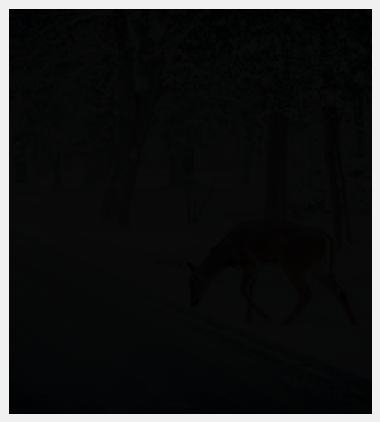

In [66]:
# Show image1 here:
show_images(image1)

#### Question 10

If you look at the data, you'll notice all the numbers lie between 0 and 10.
In `NumPy`, a color intensity is an integer ranging from 0 to 255, where 0 is
no color (black).  That's why the image is almost black.  To see the image,
we'll need to rescale the numbers in the data to have a larger range.

Define a function `expand_image_range` that takes in an image. It returns a
**new copy** of the image with the following transformation:
    
    old value | new value
    ========= | =========
    0         | 12
    1         | 37
    2         | 65
    3         | 89
    4         | 114
    5         | 137
    6         | 162
    7         | 187
    8         | 214
    9         | 240
    10        | 250

This expands the color range of the image. For example, a pixel that previously
had the value `[5 5 5]` (almost-black) will now have the value `[137 137 137]`
(gray).

Set `expanded1` to the expanded `image1`, then display it with `show_images`.

[This page](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#boolean-array-indexing)
from the numpy docs has some useful information that will allow you
to use indexing instead of `for` loops.

However, the slickest implementation uses one very short line of code.
*Hint:* If you index an array with another array or list as in question 5, your
array (or list) of indices can contain repeats, as in `array1[[0, 1, 0]]`.
Investigate what happens in that case.

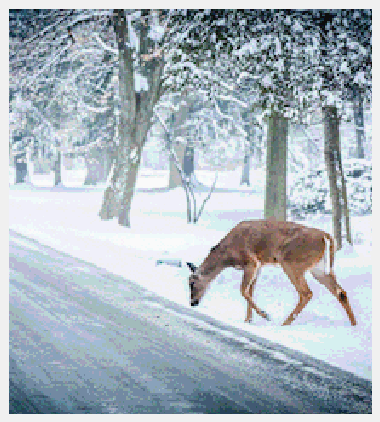

In [67]:
# This array is provided for your convenience.
transformed = np.array([12, 37, 65, 89, 114, 137, 162, 187, 214, 240, 250])

def expand_image_range(image):
    return transformed[image]

expanded1 = expand_image_range(image1)
show_images(expanded1)

In [68]:
_ = ok.grade('q10')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 11

Eureka! You've managed to reveal the image that the text file represents.

Now, define a function called `reveal_file` that takes in a filename
and returns an expanded image. This should be relatively easy since you've
defined functions for each step in the process.

Then, set `expanded_images` to a list of all the revealed images. There are
10 images to reveal (including the one you just revealed).

Finally, use `show_images` to display the `expanded_images`.

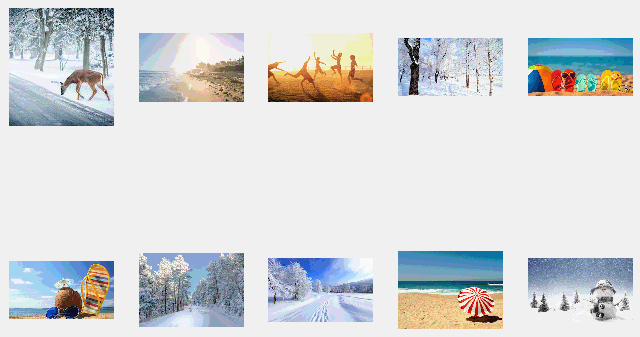

In [72]:
def reveal_file(filename):
    return expand_image_range(lines_to_image(read_file_lines(filename)))

filenames = ['1.txt', '2.txt', '3.txt', '4.txt', '5.txt',
             '6.txt', '7.txt', '8.txt', '9.txt', '10.txt']
expanded_images = [reveal_file(filename) for filename in filenames]

show_images(expanded_images, ncols=5)

Notice that 5 of the above images are of summer scenes; the other 5
are of winter.

Think about how you'd distinguish between pictures of summer and winter. What
qualities of the image seem to signal to your brain that the image is one of
summer? Of winter?

One trait that seems specific to summer pictures is that the colors are warmer.
Let's see if the proportion of pixels of each color in the image can let us
distinguish between summer and winter pictures.

#### Question 12
To simplify things, we can categorize each pixel according to its most intense
(highest-value) channel.  (Remember, red, green, and blue are the 3 channels.)
For example, we could just call a `[2 4 0]` pixel "green."  If a pixel has a
tie between several channels, let's count it as none of them.

Write a function `proportion_by_channel`. It takes in an image.  It assigns
each pixel to its greatest-intensity channel: red, green, or blue.  Then
the function returns an array of length three containing the proportion of
pixels categorized as red, the proportion categorized as green, and the
proportion categorized as blue (respectively).  (Again, don't count pixels
that are tied between 2 or 3 colors as any category, but do count them
in the denominator when you're computing proportions.)

For example:

```
>>> test_im = np.array([
  [ [5, 2, 2], [2, 5, 10] ] 
])
>>> proportion_by_channel(test_im)
array([ 0.5, 0, 0.5 ])

# If tied, count neither as the highest
>>> test_im = np.array([
  [ [5, 2, 5], [2, 50, 50] ] 
])
>>> proportion_by_channel(test_im)
array([ 0, 0, 0 ])
```

Then, set `image_proportions` to the result of `proportion_by_channel` called
on each image in `expanded_images` as a 2d array.

*Hint:* It's fine to use a `for` loop, but for a difficult challenge, try
avoiding it.  (As a side benefit, your code will be much faster.)  Our solution
uses the `NumPy` functions `np.reshape`, `np.sort`, `np.argmax`, and `np.bincount`.

In [74]:
### The one I wrote does not seem to be working, so I used the one from solution to go to next question.

def proportion_by_channel(image):
    NUM_CHANNELS = 3
    n_pixels = image.shape[0] * image.shape[1]
    flattened = image.reshape((n_pixels, NUM_CHANNELS))
    
    sorted_by_channel_value = np.sort(flattened, axis=1)
    indices_with_winner = sorted_by_channel_value[:,NUM_CHANNELS-1] != sorted_by_channel_value[:,NUM_CHANNELS-2]
    pixels_with_winner = flattened[indices_with_winner,:]
    counts = np.bincount(np.argmax(pixels_with_winner, axis=1), minlength=NUM_CHANNELS)
    return counts / n_pixels

image_proportions = np.array(
    [proportion_by_channel(image) for image in expanded_images])
image_proportions

array([[  4.51550388e-02,   1.22480620e-02,   4.51279070e-01],
       [  3.50540304e-01,   6.71728972e-04,   2.31863318e-01],
       [  5.15801056e-01,   7.62910798e-04,   8.21596244e-04],
       [  2.87152778e-02,   1.15451389e-02,   4.13854167e-01],
       [  3.09687500e-01,   4.61284722e-02,   5.90173611e-01],
       [  2.72465278e-01,   9.32291667e-03,   5.84288194e-01],
       [  2.50818777e-02,   1.65120087e-03,   6.86995087e-01],
       [  9.06250000e-04,   3.12500000e-05,   8.61062500e-01],
       [  4.23880208e-01,   1.86848958e-02,   4.20794271e-01],
       [  1.64062500e-03,   1.87500000e-04,   5.09625000e-01]])

In [75]:
_ = ok.grade('q12')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Let's plot the proportions you computed above on a bar chart:

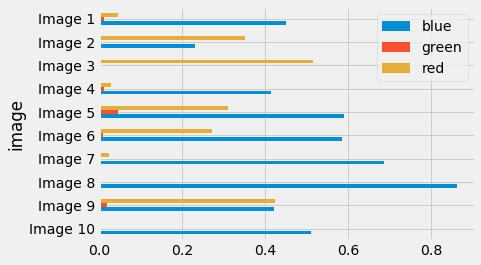

In [76]:
# You'll learn about Pandas and DataFrames soon.
import pandas as pd
pd.DataFrame({
        'red': image_proportions[:, 0],
        'green': image_proportions[:, 1],
        'blue': image_proportions[:, 2]
    }, index=pd.Series(['Image {}'.format(n) for n in range(1, 11)], name='image'))\
    .iloc[::-1]\
    .plot.barh();

#### Question 13

What do you notice about the colors present in the summer images compared to
the winter ones?

Use this info to write a function `summer_or_winter`. It takes in an image and
returns `True` if the image is a summer image and `False` if the image is a
winter image.

**Do not hard-code the function to the 10 images you currently have (eg.
`if image1, return False`).** We will run your function on other images
that we've reserved for testing.

You must classify all of the 10 provided images correctly to pass the test
for this function.


In [78]:
def summer_or_winter(image):
    return True if proportion_by_channel(image)[0] > 0.2 else False

[summer_or_winter(image) for image in expanded_images]

[False, True, True, False, True, True, False, False, True, False]

In [79]:
_ = ok.grade('q13')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Congrats! You've created your very first classifier for this class.

#### Question 14

1. How do you think your classification function will perform
   in general?
2. Why do you think it will perform that way?
3. What do you think would most likely give you false positives?
4. False negatives?

1. Generally, it should be OK. 
2. As all these files are very sunny and clear. If the pictures are for winter or summer nights, then the classification might consider everything as winter. Because there might be many ties and values are dropped.
3. Picture of winter sunset with a lot of warm color.
4. Picture of dark summer nights. Or Summer pictures with a lot of blue sky.

**Final note:** While our approach here is simplistic, skin color segmentation
-- figuring out which parts of the image belong to a human body -- is a
key step in many algorithms such as face detection.

# Optional: Our code to encode images

Here are the functions we used to generate the text files for this assignment.

Feel free to send not-so-secret messages to your friends if you'd like.

In [80]:
import skimage as sk
import skimage.io as skio

In [81]:
def read_image(filename):
    '''Reads in an image from a filename'''
    return skio.imread(filename)

In [82]:
def compress_image(im):
    '''Takes an image as an array and compresses it to look black.'''
    res = im / 25
    return res.astype(np.uint8)

In [83]:
def to_text_file(im, filename):
    '''
    Takes in an image array and a filename for the resulting text file.
    
    Creates the encoded text file for later decoding.
    '''
    h, w, c = im.shape
    to_rgb = ' '.join
    to_row = '\n'.join
    to_lines = '\n'.join
    
    rgb = [[to_rgb(triplet) for triplet in row] for row in im.astype(str)]
    lines = to_lines([to_row(row) for row in rgb])

    with open(filename, 'w') as f:
        f.write('{} {}\n'.format(h, w))
        f.write(lines)
        f.write('\n')

In [84]:
summers = skio.imread_collection('orig/summer/*.jpg')
winters = skio.imread_collection('orig/winter/*.jpg')
len(summers)

0

In [85]:
sum_nums = np.array([ 5,  6,  9,  3,  2, 11, 12])
win_nums = np.array([ 10,  7,  8,  1,  4, 13, 14])

for im, n in zip(summers, sum_nums):
    to_text_file(compress_image(im), '{}.txt'.format(n))
for im, n in zip(winters, win_nums):
    to_text_file(compress_image(im), '{}.txt'.format(n))

# 5. Submitting this assignment


First, run this cell to run all the autograder tests at once so you can double-
check your work.

In [ ]:
_ = ok.grade_all()

Now, run this code in your terminal to make a
[git commit](https://www.atlassian.com/git/tutorials/saving-changes/git-commit)
that saves a snapshot of your changes in `git`. The last line of the cell
runs [git push](http://stackoverflow.com/questions/2745076/what-are-the-differences-between-git-commit-and-git-push), which will send your work to your personal Github repo.

```
# Tell git to commit all the changes so far
git add -A

# Tell git to make the commit
git commit -m "hw1 finished"

# Send your updates to your personal private repo
git push origin master
```

Finally, we'll submit the assignment to OkPy so that the staff will know to
grade it. You can submit as many times as you want and you can choose which
submission you want us to grade by going to https://okpy.org/cal/data100/sp17/.

In [12]:
# Now, we'll submit to okpy
_ = ok.submit()

Congrats! You are done with homework 1.